# Task 2 (To predict the percentage of marks that a student is expected to score)                                         
## ‘To Explore Supervised Machine Learning’ By Maitreya Tambade

For this task I'm using the dataset which provides the information on how much marks are scored based on number of hours studied provided by TSF.

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import preprocessing

In [6]:
url = "http://bit.ly/w-data"
student_study_df = pd.read_csv(url)
student_study_df_copy = student_study_df
student_study_df_copy.head()


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
student_study_df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


### Visualizing the Data

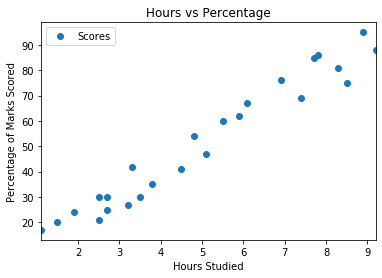

In [15]:
student_study_df.plot(x='Hours', y='Scores', style='o')  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage of Marks Scored')  
plt.show()


In the above graph , we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

In [16]:
student_study_df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Correlation Values between number of hours studied and Percentage of marks scored is 97

{'whiskers': [<matplotlib.lines.Line2D at 0x2873daec948>,
 'caps': [<matplotlib.lines.Line2D at 0x2873daecf88>,
 'boxes': [<matplotlib.lines.Line2D at 0x2873daec248>],
 'medians': [<matplotlib.lines.Line2D at 0x2873daf1f48>],
 'fliers': [<matplotlib.lines.Line2D at 0x2873daf74c8>],
 'means': []}

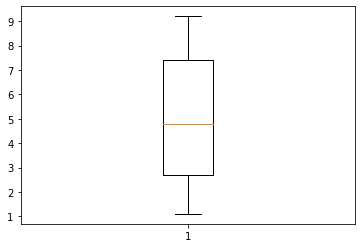

In [17]:
plt.boxplot(student_study_df.Hours)

(array([4., 5., 1., 3., 1., 2., 2., 2., 3., 2.]),
 array([17. , 24.8, 32.6, 40.4, 48.2, 56. , 63.8, 71.6, 79.4, 87.2, 95. ]),
 <a list of 10 Patch objects>)

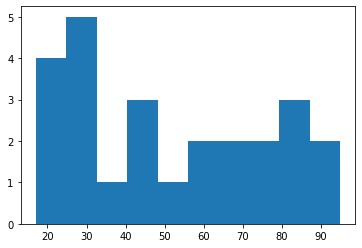

In [18]:
plt.hist(student_study_df.Scores)

### Preparing and Training the Data

In [23]:
X =student_study_df.iloc[:, :-1].values  
Y = student_study_df.iloc[:, 1].values  
X
Y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

#### Splitting Data for Testing And Training

In [24]:
from sklearn.model_selection import train_test_split  
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
print("Data Splitted")

Data Splitted


#### Training the data

In [25]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, Y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

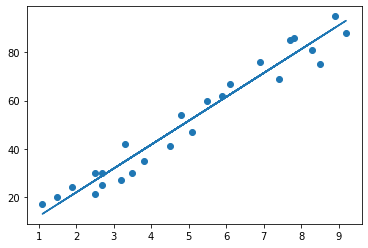

In [26]:
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

Data training is now compleated

### Predicting the DATA

In [27]:
print(X_test) # Testing data - In Hours
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


Predicting the scores on basis of test data(Hours)

#### Comparing actual Data and Predicted Data

In [28]:
df = pd.DataFrame({'Actual': Y_test, 'Predicted': y_pred})  
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


### Testing the Data with the value we have to Predict

In [29]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("Number of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

Number of Hours = 9.25
Predicted Score = 93.69173248737538


The predicted score after 9.25 hours of study is 93.691